# Feature Engeneering
## Grupo: Antônio Martins e Rodrigo Anciães

Este arquivo tem como objetivo realizar a engenharia de features do dataset de treino e teste.

In [1]:
RANDOM_SEED = 42

In [2]:
import pickle
import pathlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
DATA_DIR = pathlib.Path.cwd().parent / 'data'
print(DATA_DIR)

c:\Users\rodri\Documents\Rodrigo\Insper\OitavoSemestre\mlops\24-2-mlops-project-grupo_de_hardware\data


In [ ]:
clean_data_path = DATA_DIR / 'processed' / 'ames_clean.pkl'
clean_data_path

WindowsPath('c:/Users/rodri/Documents/Rodrigo/Insper/OitavoSemestre/mlops/24-2-mlops-project-grupo_de_hardware/data/processed/ames_clean.pkl')

In [5]:
with open(clean_data_path, 'rb') as file:
    data = pickle.load(file)

In [ ]:
model_data = data.copy()
model_data.head()

,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Lot.Shape,Land.Contour,Lot.Config,Land.Slope,Neighborhood,Bldg.Type,...,Sale.Type,Sale.Condition,SalePrice,Condition,HasShed,HasAlley,Exterior,Garage.Age,Remod.Age,House.Age
0,20,RL,141.0,31770.0,IR1,Lvl,Corner,Gtl,NAmes,1Fam,...,GroupedWD,Normal,5.332438,Norm,False,False,BrkFace,50.0,50.0,50.0
1,20,RH,80.0,11622.0,Reg,Lvl,Inside,Gtl,NAmes,1Fam,...,GroupedWD,Normal,5.021189,Roads,False,False,VinylSd,49.0,49.0,49.0
2,20,RL,81.0,14267.0,IR1,Lvl,Corner,Gtl,NAmes,1Fam,...,GroupedWD,Normal,5.235528,Norm,False,False,Wd Sdng,52.0,52.0,52.0
3,20,RL,93.0,11160.0,Reg,Lvl,Corner,Gtl,NAmes,1Fam,...,GroupedWD,Normal,5.387390,Norm,False,False,BrkFace,42.0,42.0,42.0
4,60,RL,74.0,13830.0,IR1,Lvl,Inside,Gtl,Gilbert,1Fam,...,GroupedWD,Normal,5.278525,Norm,False,False,VinylSd,13.0,12.0,13.0


## Plotando informações

1.776950298044753e-05 5.051758856699882


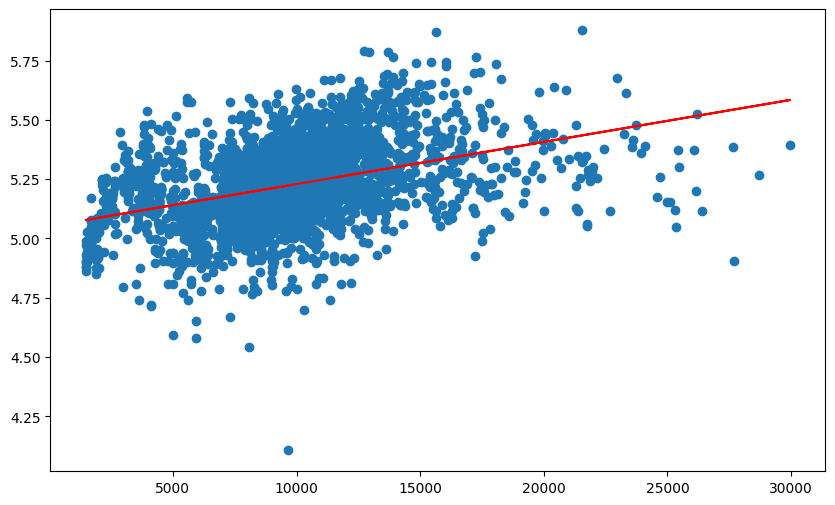

In [7]:
test = data[data['Lot.Area'] <= 30000]
# test = data[data['Lot.Area'] <= 3300000]
# sns.scatterplot(x='Lot.Area', y='SalePrice', data=test)
# sns.regplot(x='Lot.Area', y='SalePrice', data=test, scatter=False)
plt.figure(figsize=(10, 6))
plt.scatter(x='Lot.Area', y='SalePrice', data=test)
m , b = np.polyfit(test['Lot.Area'], test['SalePrice'], 1)
plt.plot(test['Lot.Area'], m*test['Lot.Area'] + b, color='red');

print(m, b)

0.00034136530357885666 5.2217775698102304


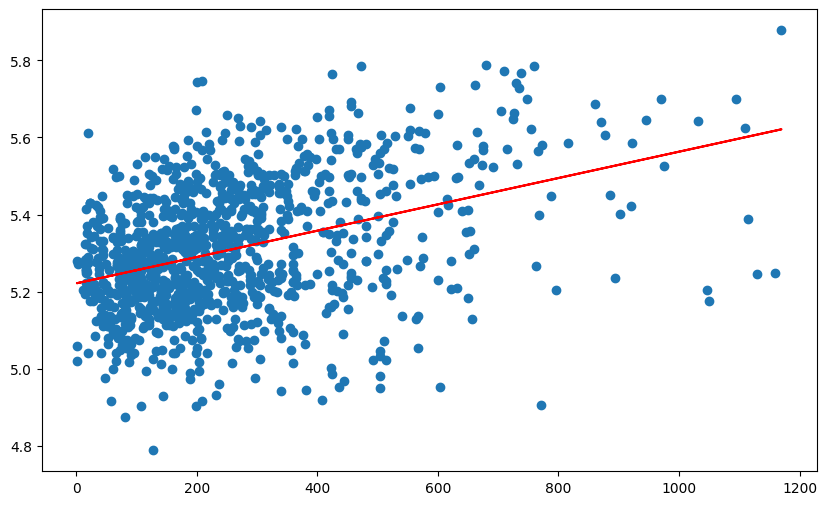

In [8]:
test = data[data['Mas.Vnr.Area'] <= 1200]
test = test[test['Mas.Vnr.Area'] > 0]
# test = data[data['Mas.Vnr.Area'] <= 1000000]
# sns.scatterplot(x='Mas.Vnr.Area', y='SalePrice', data=test)
# sns.regplot(x='Mas.Vnr.Area', y='SalePrice', data=test, scatter=False)
plt.figure(figsize=(10, 6))
plt.scatter(x='Mas.Vnr.Area', y='SalePrice', data=test)
m, b = np.polyfit(test['Mas.Vnr.Area'], test['SalePrice'], 1)
plt.plot(test['Mas.Vnr.Area'], m*test['Mas.Vnr.Area'] + b, color='red');

print (m, b)

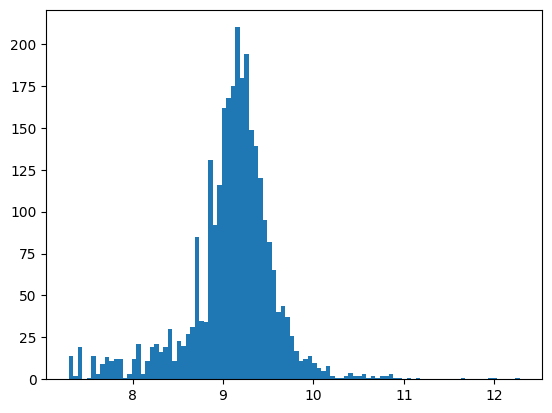

In [9]:
plt.hist(np.log(data['Lot.Area']), bins=100);

Levando em conta a maneira como os pontos estão distribuidos e o resultado do plot logaritmico, foi cogitada a transformação de Lot.Area e Mas.Vnr.Area para o log dos mesmos.

Ao observar o mundo real e o significado destas varíaveis, tamém é possível de se verificar que a área tem uma importancia logaritimica, uma vez que quando estamos trabalhando com valores baixos para a área, mais metros quadrados muito importarão para um comprador, mas quando se trata de imóveis com área de grande extensão, tamanho adicional não faz mais tanta diferença

In [10]:
data['Lot.Area'] = np.log(data['Lot.Area'])

In [11]:
data["Mas.Vnr.Area"]

0       112.0
1         0.0
2       108.0
3         0.0
4         0.0
        ...  
2925      0.0
2926      0.0
2927      0.0
2928      0.0
2929     94.0
Name: Mas.Vnr.Area, Length: 2877, dtype: float64

In [12]:
log_mas = np.log(data['Mas.Vnr.Area'])

c:\Users\rodri\Documents\Rodrigo\Insper\OitavoSemestre\mlops\24-2-mlops-project-grupo_de_hardware\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [13]:
data['Mas.Vnr.Area'] = log_mas
# remove outliers
data = data[data['Mas.Vnr.Area'] > 0]


## Visualização geral dos dados até agora

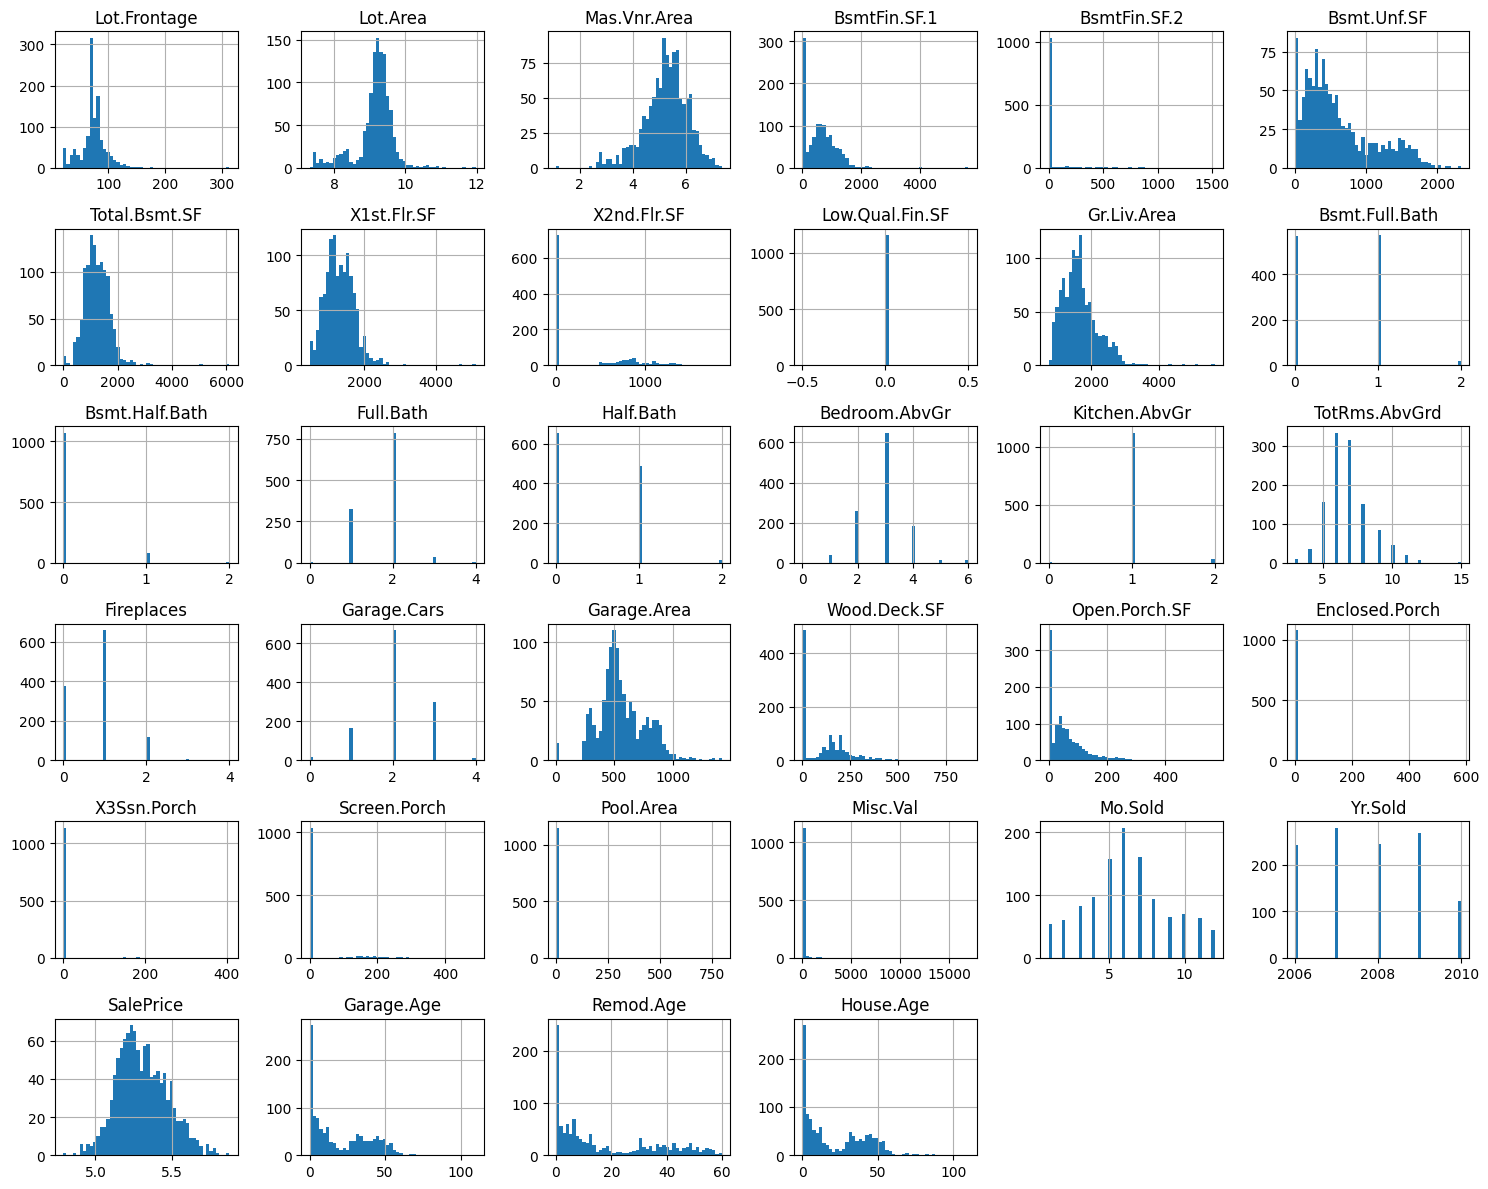

In [14]:
data.hist(figsize=(15,12), bins=50);
plt.tight_layout()
plt.show()

c:\Users\rodri\Documents\Rodrigo\Insper\OitavoSemestre\mlops\24-2-mlops-project-grupo_de_hardware\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


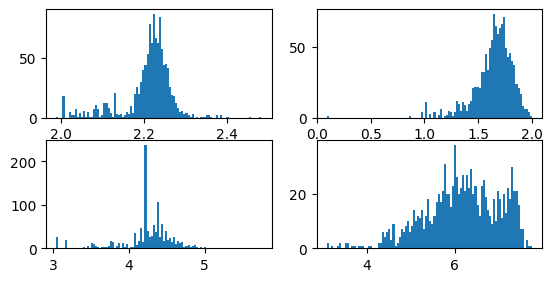

In [15]:
# Transformando para Log e Tratando os Infinitos
log_mas = np.log(data['Mas.Vnr.Area'])
log_mas.replace([np.inf, -np.inf], np.nan, inplace=True)

log_lot = np.log(data['Lot.Area'])
log_lot.replace([np.inf, -np.inf], np.nan, inplace=True)

log_lot_front = np.log(data['Lot.Frontage'])
log_lot_front.replace([np.inf, -np.inf], np.nan, inplace=True)

log_bsmt = np.log(data['Bsmt.Unf.SF'])
log_bsmt.replace([np.inf, -np.inf], np.nan, inplace=True)

log_house_age = np.log(data['House.Age'])
log_house_age.replace([np.inf, -np.inf], np.nan, inplace=True)

plt.subplot(3, 2, 1)
plt.hist(log_lot, bins=100);
plt.subplot(3, 2, 2)
plt.hist(log_mas, bins=100);
plt.subplot(3, 2, 3)
plt.hist(log_lot_front, bins=100);
plt.subplot(3, 2, 4)
plt.hist(log_bsmt, bins=100);

Através da visualização geral, foi possível notar que algumas features possuem valores estranhos, como uma grande concentração nas bordas dos gráficos (com valor 0 por exemplo).

Estas features serão tratadas a seguir

In [16]:
# pool area value count
data['Pool.Area'].value_counts()




Pool.Area
0.0      1150
144.0       1
480.0       1
519.0       1
648.0       1
800.0       1
Name: count, dtype: int64

In [17]:
data['Screen.Porch'].value_counts()

Screen.Porch
0.0      1035
144.0       7
168.0       7
192.0       6
155.0       4
         ... 
270.0       1
227.0       1
348.0       1
100.0       1
90.0        1
Name: count, Length: 78, dtype: int64

In [18]:
# pool area value count
data['X3Ssn.Porch'].value_counts()

X3Ssn.Porch
0.0      1136
153.0       3
168.0       2
216.0       2
180.0       2
255.0       1
144.0       1
182.0       1
162.0       1
225.0       1
174.0       1
304.0       1
407.0       1
245.0       1
196.0       1
Name: count, dtype: int64

Foi possível verificar que estas features realmente apresentam uma distribuição estranha, que podem estar na verdade se referindo a ausencia do elemento que a feature representa, ao invés de sua qualidade, por isso estas features serão transformadas em categóricas, de modo que representem as duas situações estremas, como tem ou não tem.

In [19]:
# TRANSFORM pool area in two categories
data['Pool.Area'] = data['Pool.Area'].apply(lambda x: 1 if x > 0 else 0)
# transforma em categorica
data['Pool.Area'] = data['Pool.Area'].astype('category')
data['Pool.Area'].value_counts()


Pool.Area
0    1150
1       5
Name: count, dtype: int64

In [20]:
# TRANSFORM screen porch in two categories
data['Screen.Porch'] = data['Screen.Porch'].apply(lambda x: 1 if x > 0 else 0)
# transforma em categorica
data['Screen.Porch'] = data['Screen.Porch'].astype('category')
data['Screen.Porch'].value_counts()

Screen.Porch
0    1035
1     120
Name: count, dtype: int64

In [21]:
# TRANSFORM 3 season porch in two categories
data['X3Ssn.Porch'] = data['X3Ssn.Porch'].apply(lambda x: 1 if x > 0 else 0)
# transforma em categorica
data['X3Ssn.Porch'] = data['X3Ssn.Porch'].astype('category')
data['X3Ssn.Porch'].value_counts()

X3Ssn.Porch
0    1136
1      19
Name: count, dtype: int64

In [22]:
data['Enclosed.Porch'].value_counts()

Enclosed.Porch
0.0      1078
216.0       4
192.0       4
144.0       4
35.0        2
150.0       2
36.0        2
252.0       2
84.0        2
240.0       2
186.0       2
154.0       2
168.0       2
113.0       1
189.0       1
164.0       1
156.0       1
202.0       1
209.0       1
120.0       1
248.0       1
228.0       1
100.0       1
203.0       1
64.0        1
98.0        1
102.0       1
86.0        1
177.0       1
55.0        1
180.0       1
368.0       1
165.0       1
16.0        1
123.0       1
218.0       1
70.0        1
280.0       1
138.0       1
90.0        1
207.0       1
246.0       1
99.0        1
176.0       1
249.0       1
275.0       1
39.0        1
88.0        1
264.0       1
19.0        1
584.0       1
224.0       1
37.0        1
40.0        1
32.0        1
324.0       1
140.0       1
296.0       1
294.0       1
116.0       1
Name: count, dtype: int64

In [23]:
# TRANSFORM Enclosed Porch in two categories
data['Enclosed.Porch'] = data['Enclosed.Porch'].apply(lambda x: 1 if x > 0 else 0)
# transforma em categorica
data['Enclosed.Porch'] = data['Enclosed.Porch'].astype('category')
data['Enclosed.Porch'].value_counts()

Enclosed.Porch
0    1078
1      77
Name: count, dtype: int64

In [24]:
data['Misc.Val'].value_counts()
# TRANSFORM Misc Val in two categories
data['Misc.Val'] = data['Misc.Val'].apply(lambda x: 1 if x > 0 else 0)
# transforma em categorica
data['Misc.Val'] = data['Misc.Val'].astype('category')
data['Misc.Val'].value_counts()

Misc.Val
0    1125
1      30
Name: count, dtype: int64

## Procurando por transformações adicionais

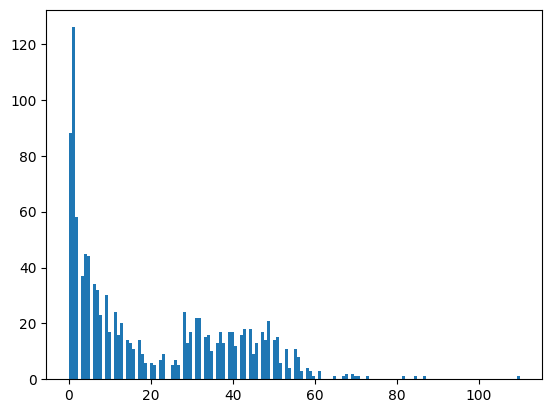

In [25]:
plt.hist(data['Garage.Age'], bins=150);

In [26]:
data['Garage.Age'].value_counts()

Garage.Age
1.0     126
0.0      88
2.0      58
4.0      45
5.0      44
       ... 
87.0      1
73.0      1
65.0      1
67.0      1
82.0      1
Name: count, Length: 72, dtype: int64

In [27]:
data['Bsmt.Unf.SF'].value_counts()


Bsmt.Unf.SF
0.0       71
162.0      6
384.0      6
186.0      6
316.0      6
          ..
1008.0     1
303.0      1
102.0      1
818.0      1
1544.0     1
Name: count, Length: 730, dtype: int64

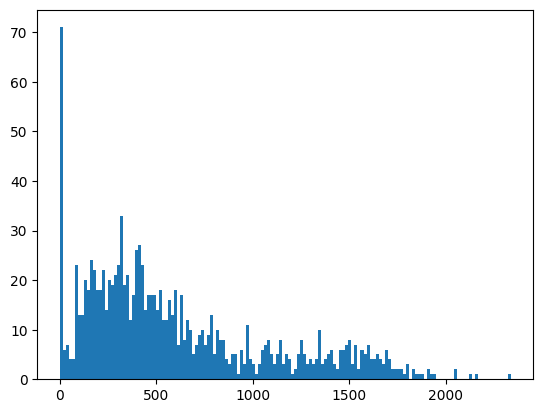

In [28]:
plt.hist(data['Bsmt.Unf.SF'], bins=150);


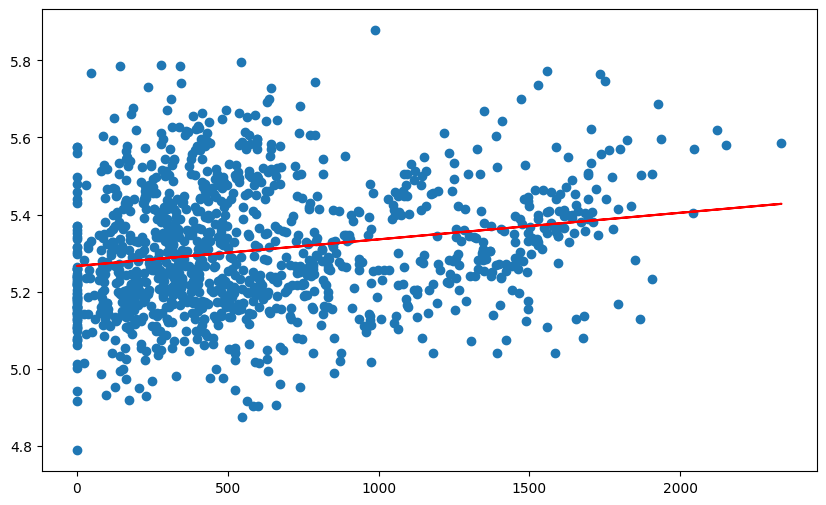

In [29]:
# Plot BSMNT UNF SF with SalePrice
plt.figure(figsize=(10, 6))
plt.scatter(x='Bsmt.Unf.SF', y='SalePrice', data=data)
m, b = np.polyfit(data['Bsmt.Unf.SF'], data['SalePrice'], 1)
plt.plot(data['Bsmt.Unf.SF'], m*data['Bsmt.Unf.SF'] + b, color='red');


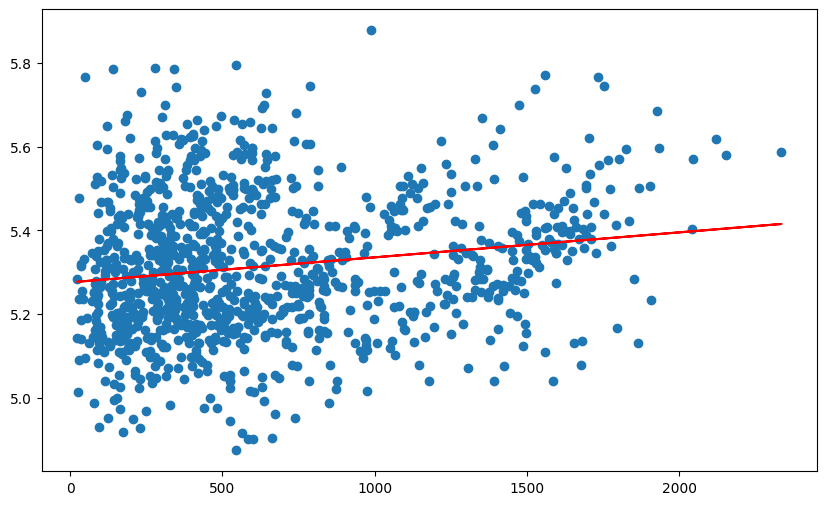

In [30]:
# removing the zeros
test = data[data['Bsmt.Unf.SF'] > 0]
plt.figure(figsize=(10, 6))
plt.scatter(x='Bsmt.Unf.SF', y='SalePrice', data=test)
m, b = np.polyfit(test['Bsmt.Unf.SF'], test['SalePrice'], 1)
plt.plot(test['Bsmt.Unf.SF'], m*test['Bsmt.Unf.SF'] + b, color='red');


Como não foram descobertas novas possibilidades de transformação prosseguiremos para a preparação das variáveis para o modelo

## Preparação das variáveis apara o modelo

In [31]:
# look for NaNs IN ALL COLUMNS
data.isna().sum().sum()


np.int64(0)

In [32]:
model_data = data.copy()
model_data.head()

,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Lot.Shape,Land.Contour,Lot.Config,Land.Slope,Neighborhood,Bldg.Type,...,Sale.Type,Sale.Condition,SalePrice,Condition,HasShed,HasAlley,Exterior,Garage.Age,Remod.Age,House.Age
0,20,RL,141.0,10.366278,IR1,Lvl,Corner,Gtl,NAmes,1Fam,...,GroupedWD,Normal,5.332438,Norm,False,False,BrkFace,50.0,50.0,50.0
2,20,RL,81.0,9.565704,IR1,Lvl,Corner,Gtl,NAmes,1Fam,...,GroupedWD,Normal,5.235528,Norm,False,False,Wd Sdng,52.0,52.0,52.0
5,60,RL,78.0,9.208138,IR1,Lvl,Inside,Gtl,Gilbert,1Fam,...,GroupedWD,Normal,5.291147,Norm,False,False,VinylSd,12.0,12.0,12.0
15,60,RL,47.0,10.887512,IR2,HLS,CulDSac,Mod,StoneBr,1Fam,...,GroupedWD,Normal,5.730782,Norm,False,False,CemntBd,7.0,7.0,7.0
17,20,RL,88.0,9.340842,Reg,Lvl,Corner,Gtl,StoneBr,1Fam,...,New,Partial,5.595972,Norm,False,False,VinylSd,0.0,0.0,0.0


In [33]:
# Ceiando uma listas de features para seus respectivos tipos
categorical_columns = []
ordinal_columns = []
for col in model_data.select_dtypes('category').columns:
    if model_data[col].cat.ordered:
        ordinal_columns.append(col)
    else:
        categorical_columns.append(col)

In [34]:
numerical_data = data.select_dtypes('number').drop(columns='SalePrice').copy()
target = data['SalePrice'].copy()
numerical_data.corrwith(target).sort_values()



ordinal_columns

c:\Users\rodri\Documents\Rodrigo\Insper\OitavoSemestre\mlops\24-2-mlops-project-grupo_de_hardware\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\rodri\Documents\Rodrigo\Insper\OitavoSemestre\mlops\24-2-mlops-project-grupo_de_hardware\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


['Lot.Shape',
 'Land.Slope',
 'Overall.Qual',
 'Overall.Cond',
 'Exter.Qual',
 'Exter.Cond',
 'Heating.QC',
 'Electrical',
 'Kitchen.Qual',
 'Functional',
 'Paved.Drive',
 'Fence']

In [35]:
categorical_columns

['MS.SubClass',
 'MS.Zoning',
 'Land.Contour',
 'Lot.Config',
 'Neighborhood',
 'Bldg.Type',
 'House.Style',
 'Roof.Style',
 'Mas.Vnr.Type',
 'Foundation',
 'Bsmt.Qual',
 'Bsmt.Cond',
 'Bsmt.Exposure',
 'BsmtFin.Type.1',
 'BsmtFin.Type.2',
 'Central.Air',
 'Garage.Type',
 'Garage.Finish',
 'Enclosed.Porch',
 'X3Ssn.Porch',
 'Screen.Porch',
 'Pool.Area',
 'Misc.Val',
 'Sale.Type',
 'Sale.Condition',
 'Condition',
 'Exterior']

In [36]:
# Fatorizando as variáveis ordinais
for col in ordinal_columns:
    codes, _ = pd.factorize(data[col], sort=True)
    model_data[col] = codes

In [37]:
model_data[ordinal_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 2929
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Lot.Shape     1155 non-null   int64
 1   Land.Slope    1155 non-null   int64
 2   Overall.Qual  1155 non-null   int64
 3   Overall.Cond  1155 non-null   int64
 4   Exter.Qual    1155 non-null   int64
 5   Exter.Cond    1155 non-null   int64
 6   Heating.QC    1155 non-null   int64
 7   Electrical    1155 non-null   int64
 8   Kitchen.Qual  1155 non-null   int64
 9   Functional    1155 non-null   int64
 10  Paved.Drive   1155 non-null   int64
 11  Fence         1155 non-null   int64
dtypes: int64(12)
memory usage: 117.3 KB


In [38]:
data['Lot.Shape'].value_counts()

Lot.Shape
Reg    643
IR1    483
IR2     23
IR3      6
Name: count, dtype: int64

In [39]:
model_data['Lot.Shape'].value_counts()

Lot.Shape
0    643
1    483
2     23
3      6
Name: count, dtype: int64

In [40]:
model_data['Exterior'].value_counts()

Exterior
VinylSd    522
HdBoard    236
MetalSd    135
Plywood     91
Wd Sdng     89
CemntBd     54
WdShing     14
Stucco       7
AsbShng      4
BrkFace      3
Other        0
Name: count, dtype: int64

In [41]:
# testes
original_data = model_data['Exterior']
encoded_data = pd.get_dummies(original_data)

aux_dataframe = encoded_data
aux_dataframe['Exterior'] = original_data.copy()

aux_dataframe.head().transpose()

,0,2,5,15,17
AsbShng,False,False,False,False,False
BrkFace,True,False,False,False,False
CemntBd,False,False,False,True,False
HdBoard,False,False,False,False,False
MetalSd,False,False,False,False,False
Plywood,False,False,False,False,False
Stucco,False,False,False,False,False
VinylSd,False,False,True,False,True
Wd Sdng,False,True,False,False,False
WdShing,False,False,False,False,False


In [42]:
original_data = model_data['Exterior']
encoded_data = pd.get_dummies(original_data, drop_first=True)

aux_dataframe = encoded_data
aux_dataframe['Exterior'] = original_data.copy()

aux_dataframe.head().transpose()

,0,2,5,15,17
BrkFace,True,False,False,False,False
CemntBd,False,False,False,True,False
HdBoard,False,False,False,False,False
MetalSd,False,False,False,False,False
Plywood,False,False,False,False,False
Stucco,False,False,False,False,False
VinylSd,False,False,True,False,True
Wd Sdng,False,True,False,False,False
WdShing,False,False,False,False,False
Other,False,False,False,False,False


In [43]:
# Preparando as variáveis categóricas para regressão
model_data = pd.get_dummies(model_data, drop_first=True)

In [44]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 2929
Columns: 165 entries, Lot.Frontage to Exterior_Other
dtypes: bool(124), float64(29), int64(12)
memory usage: 518.8 KB


In [45]:
# Definindo os dummies
for cat in categorical_columns:
    dummies = []
    for col in model_data.columns:
        if col.startswith(cat + "_"):
            dummies.append(f'"{col}"')
    dummies_str = ', '.join(dummies)
    print(f'From column "{cat}" we made {dummies_str}\n')

From column "MS.SubClass" we made "MS.SubClass_30", "MS.SubClass_50", "MS.SubClass_60", "MS.SubClass_70", "MS.SubClass_80", "MS.SubClass_85", "MS.SubClass_90", "MS.SubClass_120", "MS.SubClass_160", "MS.SubClass_190", "MS.SubClass_Other"

From column "MS.Zoning" we made "MS.Zoning_RH", "MS.Zoning_RL", "MS.Zoning_RM"

From column "Land.Contour" we made "Land.Contour_HLS", "Land.Contour_Low", "Land.Contour_Lvl"

From column "Lot.Config" we made "Lot.Config_CulDSac", "Lot.Config_FR2", "Lot.Config_FR3", "Lot.Config_Inside"

From column "Neighborhood" we made "Neighborhood_BrDale", "Neighborhood_BrkSide", "Neighborhood_ClearCr", "Neighborhood_CollgCr", "Neighborhood_Crawfor", "Neighborhood_Edwards", "Neighborhood_Gilbert", "Neighborhood_IDOTRR", "Neighborhood_MeadowV", "Neighborhood_Mitchel", "Neighborhood_NAmes", "Neighborhood_NPkVill", "Neighborhood_NWAmes", "Neighborhood_NoRidge", "Neighborhood_NridgHt", "Neighborhood_OldTown", "Neighborhood_SWISU", "Neighborhood_Sawyer", "Neighborhood_Sa

## Salvando o resultado em um arquivo

In [46]:
clean_data_path = DATA_DIR / 'processed' / 'ames_eng.pkl'
with open(clean_data_path, 'wb') as file:
    pickle.dump(model_data, file)
